# Simulation Examples

In [1]:
from qubits import SpinQubit
import pulses
from simulator_test import evolveState, plotBlochSphere, plotProjection
from noise import BroadbandNoise
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

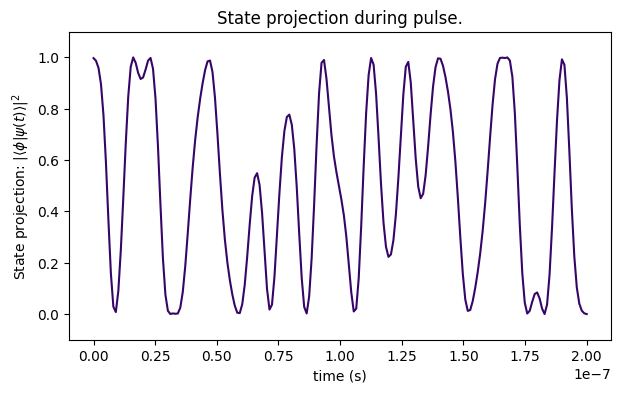

In [8]:
# Initialise qubit
q1 = SpinQubit(initial_state="up")

tau = 100e-9
dt = 1e-9 # Step size of simulation

sequence = pulses.PulseSequence(det_offset=3e6, dt=dt)
shaped_X2 = pulses.FourierPulse(tau, dt, time_symmetric=True)
sequence.X2_custom(shaped_X2)
sequence.X2_custom(shaped_X2)

q1 = SpinQubit()
states = evolveState(q1, sequence)
# plotBlochSphere(states)
plotProjection(states,sequence)
plt.show()

100%|██████████| 300/300 [00:09<00:00, 31.89it/s]


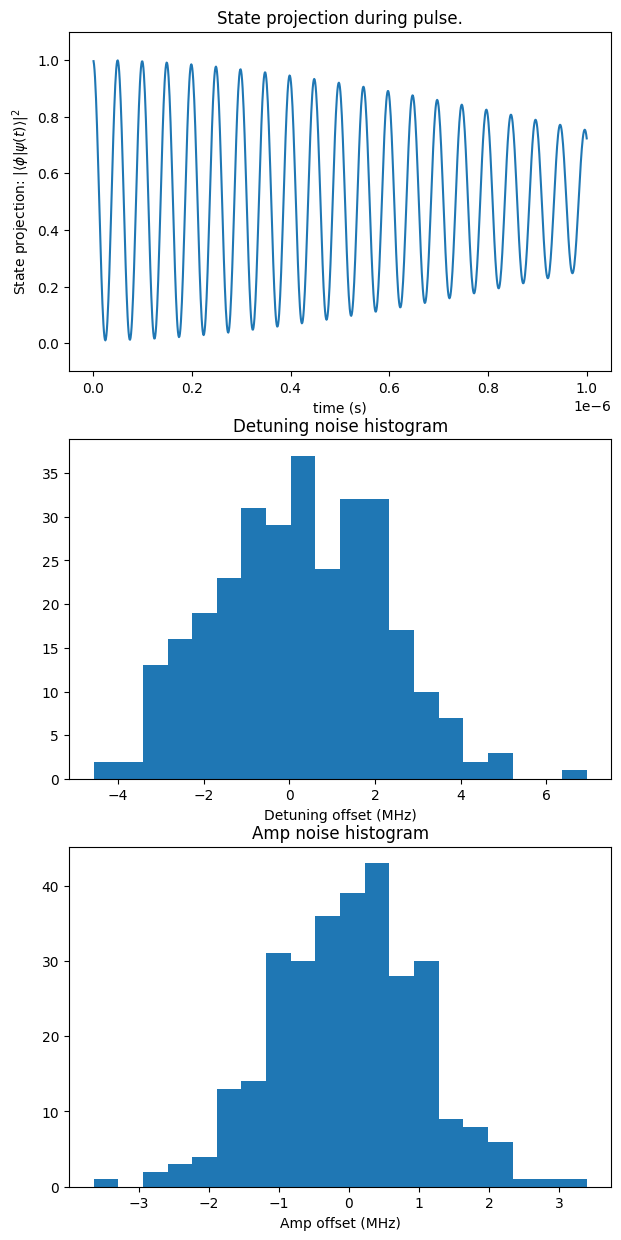

In [33]:
# Define pulse sequence
fRabi = 20e6 # Driving speed of continuous pulse
tau = 20 * 1/fRabi # rabi oscillations
dt = 1e-9 # Step size of simulation

sequence = pulses.PulseSequence(det_offset=0e6, dt=dt)
sequence.cw(tau, fRabi)

# Define noise model 
noise_model_det = BroadbandNoise(sequence.length, exponent=1.5)
noise_model_amp = BroadbandNoise(sequence.length, exponent=1.5)
detuning_noise_width = 2e6 # 1MHz noise on detuning
amp_noise_width = 0.5 * detuning_noise_width


N_shots = 300
proj_array = np.zeros([N_shots, sequence.length])

det_noise_array = np.random.normal(loc=0, scale=detuning_noise_width, size=N_shots)
amp_noise_array = np.random.normal(loc=0, scale=amp_noise_width, size=N_shots)

det_array = np.zeros([N_shots])
amp_array = np.zeros([N_shots])

for n in tqdm(range(N_shots)):
    # Reinitialise qubit each time
    q1 = SpinQubit(initial_state="up")
    # Simulate qubit evolution given qubit, pulse sequence and noise model
    # sequence.det_offset = noise_model_det.amps[n]*detuning_noise_width
    # sequence.amp_offset = noise_model_amp.amps[n]*amp_noise_width

    sequence.det_offset = det_noise_array[n]
    sequence.amp_offset = amp_noise_array[n]

    det_array[n] = sequence.det_offset
    amp_array[n] = sequence.amp_offset
    # print(sequence.det_offset)
    states = evolveState(q1, sequence)
    proj_array[n, :] = plotProjection(states, sequence, proj="up", plot_output=False)

proj_avg = np.average(proj_array, 0)
times = np.linspace(sequence.dt, sequence.time, sequence.length)

n_bins = 20

fig, ax = plt.subplots(3, 1, figsize=(7, 15))
# for n in range(N_shots):
#     plt.plot(times, proj_array[n, :])

ax[0].plot(times, proj_avg)
ax[0].set_xlabel('time (s)')
ax[0].set_ylabel(r'State projection: $|\langle \phi | \psi (t) \rangle|^2$')
ax[0].set_title('State projection during pulse.')
ax[0].set_ylim([-0.1, 1.1])

ax[1].hist(det_array/1e6, n_bins)
ax[1].set_xlabel('Detuning offset (MHz)')
# ax[1].set_ylabel('Frequency')
ax[1].set_title('Detuning noise histogram')

ax[2].hist(amp_array/1e6, n_bins)
ax[2].set_xlabel('Amp offset (MHz)')
# ax[1].set_ylabel('Frequency')
ax[2].set_title('Amp noise histogram')

plt.show()

100%|██████████| 300/300 [00:47<00:00,  6.27it/s]


Text(0.5, 1.0, 'Amp noise histogram')

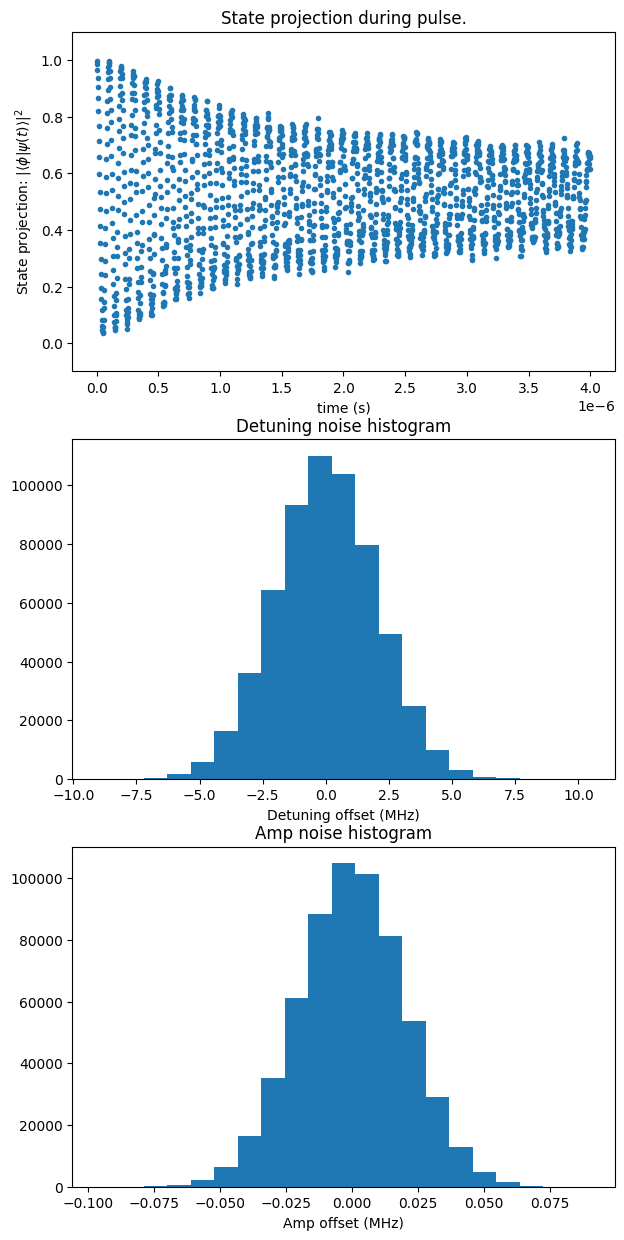

In [4]:
## Simulate noise on every shot (reduce shots from 1ns intervals)
# Define pulse sequence
fRabi = 10e6 # Driving speed of continuous pulse
tau = 40 * 1/fRabi # rabi oscillations
# dt = 0.25 *1/fRabi # Step size of simulation
dt = 2e-9 

times = np.linspace(dt, tau, int(np.ceil(tau/dt)))
N_shots = 300

# Noise properties
detuning_noise_width = 2e6 # 1MHz noise on detuning
amp_noise_width = 0.01 * detuning_noise_width
det_noise_array = np.random.normal(loc=0, scale=detuning_noise_width, size=[N_shots, len(times)])
amp_noise_array = np.random.normal(loc=0, scale=amp_noise_width, size=[N_shots, len(times)])


proj_array = np.zeros(len(times))
det_array = np.zeros([N_shots, len(times)])
amp_array = np.zeros([N_shots, len(times)])

for n in tqdm(range(N_shots)):
    for t in range(len(times)):
        # Initialise qubit
        q1 = SpinQubit(initial_state="up")

        # Make pulse sequence
        sequence = pulses.PulseSequence(det_offset=0e6, dt=times[t])
        sequence.cw(times[t], fRabi)

        # Collect noise
        sequence.det_offset = det_noise_array[n, t]
        sequence.amp_offset = amp_noise_array[n, t]
        det_array[n, t] = sequence.det_offset
        amp_array[n, t] = sequence.amp_offset

        # Simulate evolution
        states = evolveState(q1, sequence)
        proj_array[t] += plotProjection(states, sequence, plot_output=False)[0]

proj_avg = proj_array/N_shots
det_array = det_array.reshape(-1)
amp_array = amp_array.reshape(-1)
n_bins = 21

fig, ax = plt.subplots(3, 1, figsize=(7, 15))

ax[0].plot(times, proj_avg, '.')
ax[0].set_xlabel('time (s)')
ax[0].set_ylabel(r'State projection: $|\langle \phi | \psi (t) \rangle|^2$')
ax[0].set_title('State projection during pulse.')
ax[0].set_ylim([-0.1, 1.1])

ax[1].hist(det_array/1e6, n_bins)
ax[1].set_xlabel('Detuning offset (MHz)')
# ax[1].set_ylabel('Frequency')
ax[1].set_title('Detuning noise histogram')

ax[2].hist(amp_array/1e6, n_bins)
ax[2].set_xlabel('Amp offset (MHz)')
# ax[1].set_ylabel('Frequency')
ax[2].set_title('Amp noise histogram')

Tau = 2e-09 done.
Tau = 4e-09 done.
Tau = 6.000000000000001e-09 done.
Tau = 8e-09 done.
Tau = 1e-08 done.
Tau = 1.2e-08 done.
Tau = 1.4000000000000001e-08 done.
Tau = 1.6e-08 done.
Tau = 1.8000000000000002e-08 done.
Tau = 2.0000000000000004e-08 done.
Tau = 2.2000000000000002e-08 done.
Tau = 2.4000000000000003e-08 done.
Tau = 2.6000000000000005e-08 done.
Tau = 2.8000000000000003e-08 done.
Tau = 3.0000000000000004e-08 done.
Tau = 3.2e-08 done.
Tau = 3.4e-08 done.
Tau = 3.6e-08 done.
Tau = 3.8e-08 done.
Tau = 4e-08 done.
Tau = 4.2e-08 done.
Tau = 4.4000000000000004e-08 done.
Tau = 4.6e-08 done.
Tau = 4.8e-08 done.
Tau = 5.0000000000000004e-08 done.
Tau = 5.2e-08 done.
Tau = 5.4e-08 done.
Tau = 5.6e-08 done.
Tau = 5.8e-08 done.
Tau = 6.000000000000001e-08 done.
Tau = 6.200000000000001e-08 done.
Tau = 6.4e-08 done.
Tau = 6.600000000000001e-08 done.
Tau = 6.800000000000001e-08 done.
Tau = 7e-08 done.
Tau = 7.200000000000001e-08 done.
Tau = 7.400000000000001e-08 done.
Tau = 7.6e-08 done.
Tau 

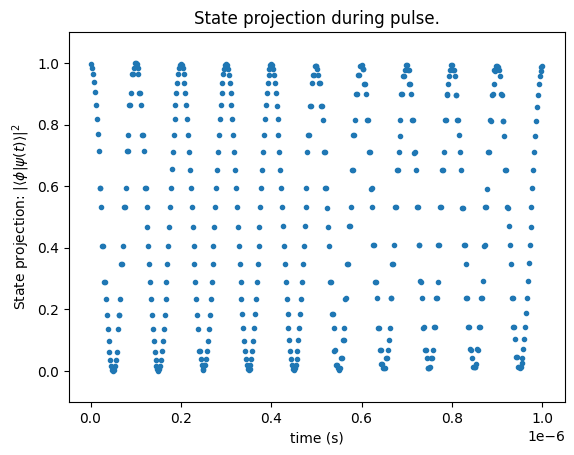

In [7]:
# Same as above, but now have noise every time step
## Simulate noise on every shot (reduce shots from 1ns intervals)
# Define pulse sequence
fRabi = 10e6 # Driving speed of continuous pulse
tau = 10 * 1/fRabi # rabi oscillations
# dt = 0.25 *1/fRabi # Step size of simulation
dt = 2e-9

times = np.linspace(dt, tau, int(np.ceil(tau/dt)))
N_shots = 300

# Noise properties
detuning_noise_width = 1e6 # 1MHz noise on detuning
amp_noise_width = 0.01 * detuning_noise_width

proj_array = np.zeros(len(times))

for t in range(len(times)):
    # Generate noise
    det_noise_array = np.random.normal(loc=0, scale=detuning_noise_width, size=[N_shots, int(np.ceil(times[t]/dt))])

    # Make pulse sequence
    sequence = pulses.PulseSequence(det_offset=0e6, dt=dt)
    sequence.cw(times[t], fRabi)
    
    for n in range(N_shots):
        # Generate noise
        det_noise_array_n = det_noise_array[n, :]

        # Initialise qubit
        q1 = SpinQubit(initial_state="up")

        # Simulate evolution
        states = evolveState(q1, sequence, det_noise_array_n)
        proj_array[t] += plotProjection(states[-1], sequence, plot_output=False)[0][0]

    print(f'Tau = {times[t]} done.')


proj_avg = proj_array/N_shots

# fig, ax = plt.subplots(3, 1, figsize=(7, 15))

plt.plot(times, proj_avg, '.')
plt.xlabel('time (s)')
plt.ylabel(r'State projection: $|\langle \phi | \psi (t) \rangle|^2$')
plt.title('State projection during pulse.')
plt.ylim([-0.1, 1.1]) 
plt.show() 

In [18]:
det_noise_array_n

array([-8.05595933e+04, -1.56029772e+05,  2.99009977e+04,  8.40839905e+04,
       -7.59900541e+04,  1.25935838e+05, -1.11371526e+05,  1.17063740e+05,
        1.25793796e+05,  1.71246950e+05,  3.54372856e+04, -1.19772042e+05,
        3.30490200e+04,  2.65707054e+05,  1.66652548e+05,  1.24050765e+04,
       -5.94923786e+04, -6.74324110e+04,  8.24721450e+04, -1.86610174e+04,
       -6.22029184e+04,  2.67593793e+04, -4.57562255e+04, -1.59191037e+05,
        1.55106626e+04, -3.61612331e+04,  3.08133630e+04,  1.85086526e+04,
       -7.63790089e+04,  1.41200075e+05,  1.00254289e+05,  5.17667728e+04,
       -1.10558473e+05, -8.64137880e+04, -1.16201686e+04, -1.16455106e+05,
       -8.13755588e+04, -1.11485722e+05,  1.94038441e+04, -3.32423501e+04,
       -1.55204548e+05, -1.46445941e+03, -1.17844522e+05,  6.05943747e+04,
        2.61228157e+04, -1.56656397e+05, -2.95582227e+04, -4.95032706e+04,
        1.29272564e+05,  3.76107010e+04,  1.50984890e+05, -1.08003929e+05,
       -1.81607386e+04, -

100%|██████████| 300/300 [02:39<00:00,  1.88it/s]


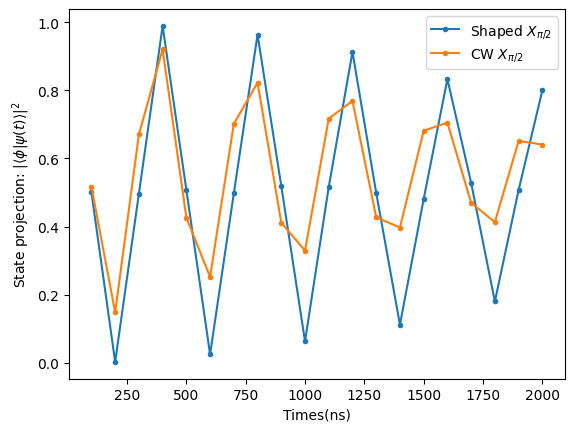

In [3]:
# Digital rabi with regular vs. shaped pulse
dt = 1e-9 # Required resolution for shaped pulses
tau_X2 = 100e-9 # length of shaped Xpi/2
n_X2 = 4*5  # Number of Xpi/2 pulses = 4 * num of rabi oscillations
# CW Rabi variables
fRabi = 1/(4*tau_X2)

shaped_X2 = pulses.FourierPulse(tau_X2, dt, time_symmetric=True)

times_dig = np.linspace(tau_X2, n_X2*tau_X2, n_X2)
N_shots = 300

# Noise properties
detuning_noise_width = 1e6 # 1MHz noise on detuning
amp_noise_width = 0.5 * detuning_noise_width
det_noise_array = np.random.normal(loc=0, scale=detuning_noise_width, size=[N_shots, len(times_dig)])
amp_noise_array = np.random.normal(loc=0, scale=amp_noise_width, size=[N_shots, len(times_dig)])


shaped_proj_array = np.zeros(len(times_dig))
cw_proj_array = np.zeros(len(times_dig))

for n in tqdm(range(N_shots)):
    # Initialise pulse sequence
    shaped_sequence = pulses.PulseSequence(det_offset=0e6, dt=dt)
    for t in range(len(times_dig)):
        # Initialise qubit
        q1 = SpinQubit(initial_state="up")
        q2 = SpinQubit(initial_state="up")

        # Add X2 gate to pulse
        shaped_sequence.X2_custom(shaped_X2)

        cw_sequence = pulses.PulseSequence(det_offset=0e6, dt=times_dig[t])
        cw_sequence.cw(times_dig[t], fRabi)

        # # Collect noise
        cw_sequence.det_offset = det_noise_array[n, t]
        cw_sequence.amp_offset = amp_noise_array[n, t]
        shaped_sequence.det_offset = det_noise_array[n, t]
        shaped_sequence.amp_offset = amp_noise_array[n, t]
        # det_array[n, t] = sequence.det_offset
        # amp_array[n, t] = sequence.amp_offset

        # Simulate evolution
        shaped_states = evolveState(q1, shaped_sequence)
        cw_states = evolveState(q2, cw_sequence)
        shaped_proj_array[t] += plotProjection(shaped_states[-1], shaped_sequence, plot_output=False)[0][0]
        cw_proj_array[t] += plotProjection(cw_states[-1], cw_sequence, plot_output=False)[0][0]

shaped_proj_avg = shaped_proj_array/N_shots
cw_proj_avg = cw_proj_array/N_shots


plt.plot(times_dig/1e-9, shaped_proj_avg, '.-', label=r'Shaped $X_{\pi/2}$')
plt.plot(times_dig/1e-9, cw_proj_avg, '.-', label=r'CW $X_{\pi/2}$')
plt.xlabel('Times(ns)')
plt.ylabel(r'State projection: $|\langle \phi | \psi (t) \rangle|^2$')
plt.legend()



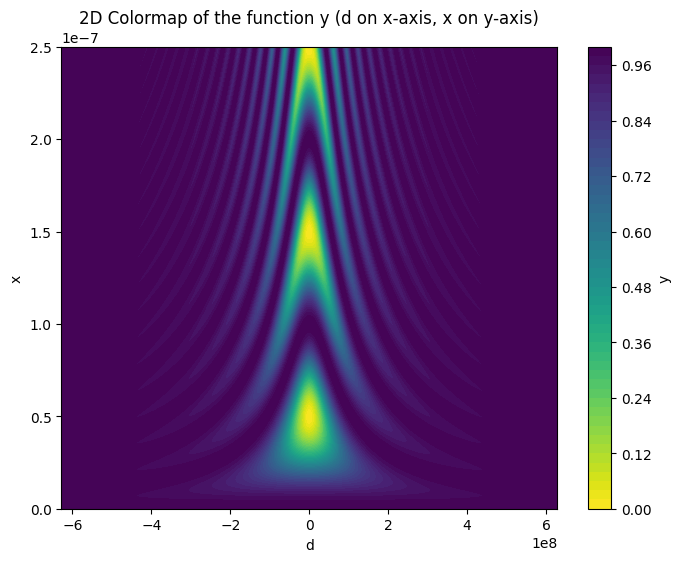

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Set the value of w (you can modify this value as needed)
w = 10e6*(2*np.pi)

# Define the function
def y_function(t, det, w):
    term1 = np.cos((t / 2) * np.sqrt(w**2 + det**2))**2
    term2 = np.sin((t / 2) * np.sqrt(w**2 + det**2))**2 * (det**2 / (det**2 + w**2))
    return term1 + term2

# Create a meshgrid for x and d
t_vals = np.linspace(0, 250e-9, 500)
det_vals = np.linspace(-100e6, 100e6, 500)*(2*np.pi)
D, X = np.meshgrid(det_vals, t_vals)  # Swap the order here

# Calculate the values of y for the meshgrid
Y = y_function(X, D, w)

# Plot the 2D colormap with d on the x-axis and x on the y-axis
plt.figure(figsize=(8, 6))
plt.contourf(D, X, Y, 50, cmap='viridis_r')
plt.colorbar(label='y')
plt.xlabel('d')
plt.ylabel('x')
plt.title('2D Colormap of the function y (d on x-axis, x on y-axis)')
plt.show()


## Rectangular Pulses

The simulation functions calculate the time evolution of the spin under the following Hamiltonian in the rotating frame:
$$ 
H = \frac{\hbar\Delta}{2}\hat{\sigma}_z + \frac{\hbar\omega_x(t)}{2}\hat{\sigma}_x \frac{\hbar\omega_y(t)}{2}\hat{\sigma}_y
$$
Using this model we can simulate a range of standard qubit experiments, and visualise the qubit dynamics using the spin projection, polarisation, or position on the Bloch sphere.

In [3]:
# Defining a rectangular pulse
fRabi = 10e6 # Specify Rabi frequency
wx = 2*np.pi*fRabi # Corresponding driving amplitude
# Time the drive based on the desired rotation
tau = 0.25*1/fRabi # Xpi/2 rotaion
# tau = 0.5*1/fRabi # Xpi rotation

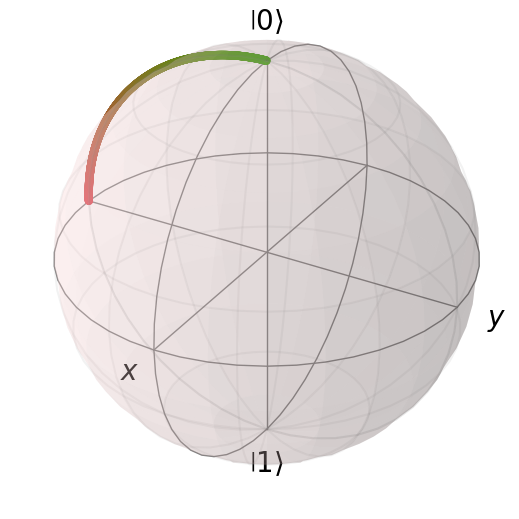

In [14]:
# Visualise on Bloch sphere
psi0 = up # Initial qubit state
det = 0 # Detuning in Hz
sim.simulateBlochSphere(up, wx, 0, det, tau)
plt.show()

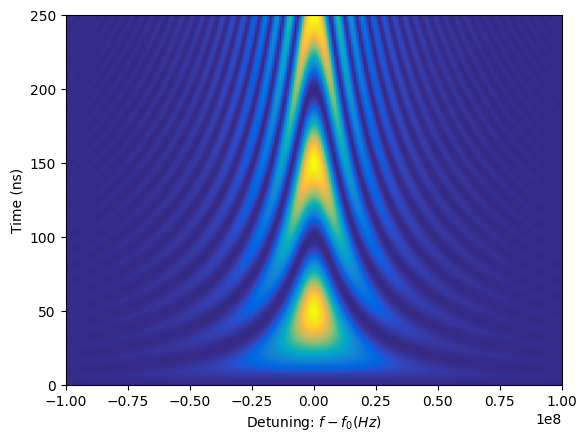

In [15]:
# Rabi chevron
psi0 = up
proj = down # Projection state for measurement
detunings = np.linspace(-100e6, 100e6, 200)
sim.timeRabiSpectrum(psi0, proj, wx, 0, detunings, tau*10)
plt.show()

In [ ]:
# Ramsey experiment
# Set up a pulse with an Xpi/2, a pause, and another Xpi/2
fRabi = 10e6 # Specify Rabi frequency
wx = 2*np.pi*fRabi # Corresponding driving amplitude
tau1 = 0.25*1/fRabi # Xpi/2 rotaion
sr = 5e9 # Sample rate of pulse

# Make wx and array
wx = np.ones(int(sr*tau1))*wx
wy = np.zeros(int(sr*tau1))

psi0 = up
proj = down

hold_times = np.linspace(0, 400e-9, 100)
detunings = np.linspace(-50e6, 50e6, 100)
map = np.zeros((len(hold_times), len(detunings)))

for i in tqdm(range(len(hold_times))):
    t = hold_times[i]
    hold = np.zeros(int(sr*t))
    pulse_x = np.concatenate([wx, hold, wx])
    pulse_y = np.concatenate([wy, hold, wy])
    tau = tau1 + t + tau1
    for d in range(len(detunings)):
        states = sim.evolveState(psi0, pulse_x, pulse_y, detunings[d], tau) # Evolve state under pulse
        map[i, d] = np.abs(np.matmul(np.conjugate(proj).T, states[-1]))**2 # Take projection


  0%|          | 0/100 [00:00<?, ?it/s]/tmp/ipykernel_54832/1106063170.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  map[i, d] = np.abs(np.matmul(np.conjugate(proj).T, states[-1]))**2 # Take projection
100%|██████████| 100/100 [04:20<00:00,  2.60s/it]


Text(0, 0.5, 'Time (ns)')

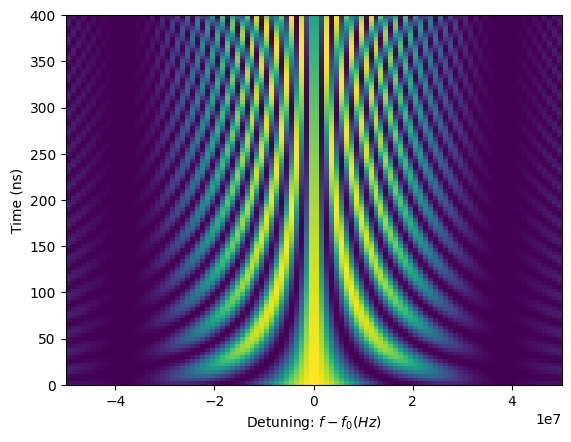

In [35]:
# Plotting
map = np.rot90(map, 2)

fig, ax = plt.subplots()
im = ax.imshow(map, interpolation=None,
                       extent=[detunings.min(), detunings.max(), 0, 400])
ax.set_aspect('auto')
ax.set_xlabel(r'Detuning: $f - f_0 (Hz)$')
ax.set_ylabel('Time (ns)')

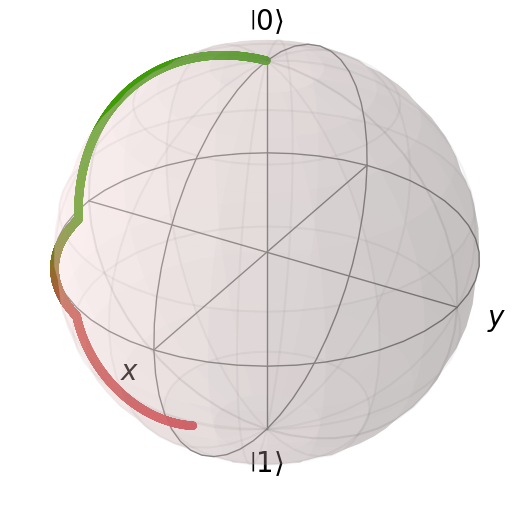

In [50]:
# We can also visualise one of these pulses on the bloch sphere
fRabi = 10e6 # Specify Rabi frequency
wx = 2*np.pi*fRabi # Corresponding driving amplitude
tau1 = 0.25*1/fRabi # Xpi/2 rotaion
sr = 10e9 # Sample rate of pulse

# Make wx and array
wx = np.ones(int(sr*tau1))*wx
wy = np.zeros(int(sr*tau1))

det = 1e6 # Some non-zero detuning
t_pause = 150e-9
hold = np.zeros(int(sr*t_pause))
pulse_x = np.concatenate([wx, hold, wx])
pulse_y = np.concatenate([wy, hold, wy])
# tau = tau1 + t_pause + tau1
tau = tau1 + t_pause + tau1

sim.simulateBlochSphere(psi0, pulse_x, pulse_y, det, tau)
plt.show()